/tmp/ipykernel_57244/2004774828.py:58: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_syd = data_syd[(data["date"] > date_syd - pd.Timedelta(days=6))
/tmp/ipykernel_57244/2004774828.py:102: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_mel = data_mel[(data["date"] > date_mel - pd.Timedelta(days=6))


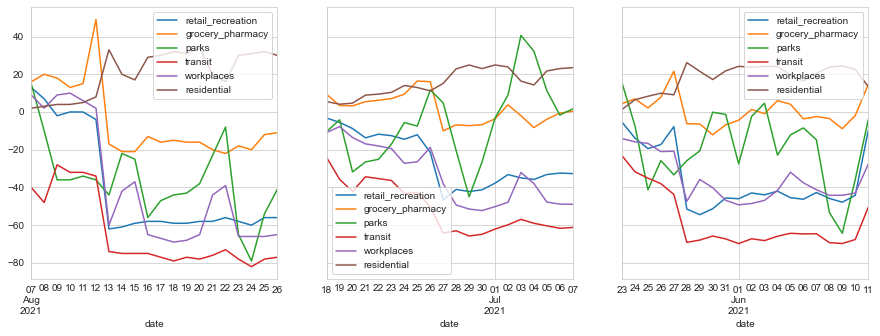

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

date_syd = pd.to_datetime("2021-06-23")
date_mel = pd.to_datetime("2021-05-28")
date_cbr = pd.to_datetime("2021-08-12")

data = pd.read_csv("./au_2021.csv", parse_dates=["date"], usecols=[2,3,8,9,10,11,12,13,14])
data.columns = ["state", "region", "date", "retail_recreation", "grocery_pharmacy", "parks", "transit", "workplaces", "residential"]

data_cbr = data[(data["state"] == "Australian Capital Territory")
                & (data["date"] > date_cbr - pd.Timedelta(days=6))
                & (data["date"] < date_cbr + pd.Timedelta(days=15))][data.columns[2:]]

syd = [
    "Bayside",
    "Blacktown",
    "Burwood",
    "Camden",
    "Campbelltown",
    "Canada Bay",
    "Canterbury",
    "Bankstown",
    "Cumberland",
    "Fairfield",
    "Hawkesbury",
    "Hornsby",
    "Inner West",
    "Ku-ring-gai",
    "Lane Cove",
    "Liverpool",
    "Mosman",
    "North Sydney",
    "Northern Beaches",
    "Parramatta",
    "Penrith",
    "Randwick",
    "Ryde",
    "Strathfield",
    "Sutherland Shire",
    "Sydney",
    "The Hills Shire",
    "Waverley",
    "Willoughby",
    "Wollondilly",
    "Woollahra"
]

data_syd = pd.DataFrame(columns=data_cbr.columns)
data_nsw = data[(data["region"].notna()) * (data["state"] == "New South Wales")]

for council in syd:
    data_syd = data_syd.append(data_nsw[data_nsw["region"].apply(lambda x: council in x)][data_cbr.columns])
    
data_syd = data_syd.groupby("date").mean().reset_index()
data_syd = data_syd[(data["date"] > date_syd - pd.Timedelta(days=6))
                & (data["date"] < date_syd + pd.Timedelta(days=15))]

mel = [
    "Banyule",
    "Bayside",
    "Boroondara",
    "Brimbank",
    "Cardinia",
    "Casey",
    "Darebin",
    "Frankston",
    "Glen Eira",
    "Greater Dandenong",
    "Hobsons Bay",
    "Hume",
    "Kingston",
    "Knox",
    "Manningham",
    "Maribyrnong",
    "Maroondah",
    "Melbourne",
    "Melton",
    "Monash",
    "Moonee Valley",
    "Moreland",
    "Mornington Peninsula",
    "Nillumbik",
    "Port Phillip",
    "Stonnington",
    "Whitehorse",
    "Whittlesea",
    "Wyndham",
    "City of Yarra",
    "Yarra Ranges"
]

data_mel = pd.DataFrame(columns=data_cbr.columns)
data_vic = data[(data["region"].notna()) * (data["state"] == "Victoria")]

for council in mel:
    data_mel = data_mel.append(data_vic[data_vic["region"].apply(lambda x: council in x)][data_cbr.columns])

data_mel = data_mel.groupby("date").mean().reset_index()
data_mel = data_mel[(data["date"] > date_mel - pd.Timedelta(days=6))
                & (data["date"] < date_mel + pd.Timedelta(days=15))]

f, a = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
data_cbr.plot("date", ax=a[0])
data_syd.plot("date", ax=a[1])
data_mel.plot("date", ax=a[2])

data_cbr["city"] = "Canberra"
data_syd["city"] = "Sydney"
data_mel["city"] = "Melbourne"
data_cities = data_cbr.append(data_syd).append(data_mel)
data_cities.to_csv("cities.csv", index=False)